## Data Exploration

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
df = pd.read_csv('derived_data/train_data_merged_2016.csv')
df.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [7]:
df.shape

(90275, 60)

C:\Users\Asus\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


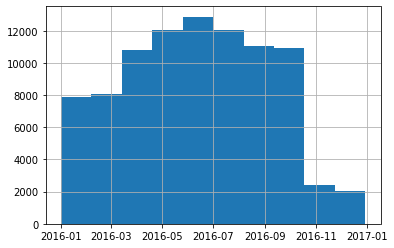

In [8]:
#Check the Transaction Date Range
pd.to_datetime(df.transactiondate).hist()

## Check for Duplicate parcelid

In [9]:
df.parcelid.nunique() == len(df)

False

In [10]:
count_per_percelid = df.groupby('parcelid').size()
more_than_one_sale = df[df.parcelid.isin(count_per_percelid[count_per_percelid>1].index)]
only_one_sale = df[df.parcelid.isin(count_per_percelid[count_per_percelid==1].index)]

print(more_than_one_sale.parcelid.nunique())

more_than_one_sale.head(10)

124


,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
496,13850164,-0.1567,2016-01-05,13.0,NaN,NaN,2.0,3.0,NaN,NaN,...,1.0,NaN,76740.0,260828.0,2015.0,184088.0,3079.84,NaN,NaN,6.059001e+13
497,13850164,-0.0460,2016-06-29,13.0,NaN,NaN,2.0,3.0,NaN,NaN,...,1.0,NaN,76740.0,260828.0,2015.0,184088.0,3079.84,NaN,NaN,6.059001e+13
781,14677191,-0.3682,2016-01-06,1.0,NaN,NaN,2.0,2.0,NaN,NaN,...,1.0,NaN,95488.0,234504.0,2015.0,139016.0,2467.90,NaN,NaN,6.059063e+13
782,14677191,-0.0845,2016-09-12,1.0,NaN,NaN,2.0,2.0,NaN,NaN,...,1.0,NaN,95488.0,234504.0,2015.0,139016.0,2467.90,NaN,NaN,6.059063e+13
813,11005771,-0.0131,2016-01-06,NaN,NaN,NaN,2.0,5.0,NaN,4.0,...,NaN,NaN,56889.0,75221.0,2015.0,18332.0,1134.10,NaN,NaN,6.037101e+13
814,11005771,0.0545,2016-06-17,NaN,NaN,NaN,2.0,5.0,NaN,4.0,...,NaN,NaN,56889.0,75221.0,2015.0,18332.0,1134.10,NaN,NaN,6.037101e+13
967,11183209,-0.0481,2016-01-07,1.0,NaN,NaN,3.0,4.0,NaN,4.0,...,NaN,NaN,222215.0,275555.0,2015.0,53340.0,4375.10,NaN,NaN,6.037910e+13
968,11183209,-0.0070,2016-09-14,1.0,NaN,NaN,3.0,4.0,NaN,4.0,...,NaN,NaN,222215.0,275555.0,2015.0,53340.0,4375.10,NaN,NaN,6.037910e+13
1164,11554091,-0.1696,2016-01-07,NaN,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,208376.0,437155.0,2015.0,228779.0,5448.05,NaN,NaN,6.037272e+13
1165,11554091,-0.0954,2016-07-05,NaN,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,208376.0,437155.0,2015.0,228779.0,5448.05,NaN,NaN,6.037272e+13


#### It appears that some homes were sold twice during the period that the training data was captured.

In [12]:
# Deleting by choosing a random sell record
reduced_df = more_than_one_sale.sample(frac=1, random_state=0).groupby('parcelid').head(1)
reduced_df = pd.concat([only_one_sale, reduced_df])

In [13]:
reduced_df.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [14]:
reduced_df.parcelid.nunique() == len(reduced_df)

True

## Explore Null Values

In [36]:
reduced_df.isnull().sum().sort_values(ascending=False)

buildingclasstypeid             90134
finishedsquarefeet13            90117
basementsqft                    90107
storytypeid                     90107
yardbuildingsqft26              90055
fireplaceflag                   89930
architecturalstyletypeid        89890
typeconstructiontypeid          89852
finishedsquarefeet6             89731
decktypeid                      89492
poolsizesum                     89184
pooltypeid10                    88991
pooltypeid2                     88946
taxdelinquencyyear              88375
taxdelinquencyflag              88375
hashottuborspa                  87787
yardbuildingsqft17              87505
finishedsquarefeet15            86595
finishedsquarefeet50            83300
finishedfloor1squarefeet        83300
fireplacecnt                    80553
threequarterbathnbr             78154
pooltypeid7                     73478
poolcnt                         72274
numberofstories                 69610
airconditioningtypeid           61402
garagecarcnt

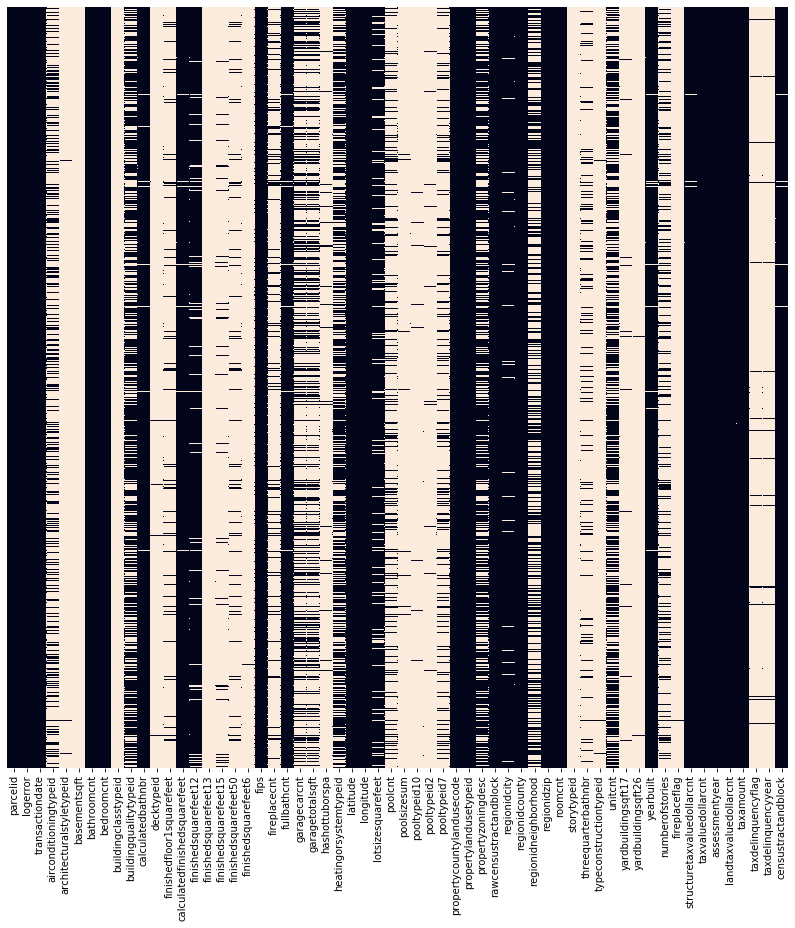

In [20]:
#visulize null values by heatmap
plt.figure(figsize = (14 , 14))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

## Exploring Unique Values

In [48]:
reduced_df.nunique(dropna=False).sort_values(ascending=False)

parcelid                        90150
taxamount                       85111
latitude                        73312
longitude                       71900
landtaxvaluedollarcnt           57067
taxvaluedollarcnt               55939
structuretaxvaluedollarcnt      55451
rawcensustractandblock          42643
censustractandblock             42399
lotsizesquarefeet               20017
calculatedfinishedsquarefeet     5103
finishedsquarefeet12             4983
propertyzoningdesc               1997
finishedsquarefeet15             1916
finishedsquarefeet50             1899
logerror                         1893
finishedfloor1squarefeet         1887
garagetotalsqft                   871
yardbuildingsqft17                568
regionidneighborhood              495
regionidzip                       389
finishedsquarefeet6               361
transactiondate                   352
poolsizesum                       274
regionidcity                      178
yearbuilt                         131
propertycoun

#### Variables with High Cardinality to watch out for:

* rawcensustractandblock
* censustractandblock
* propertyzoningdesc
* regionidneighborhood
* regionidzip

## Inspect Target Variable

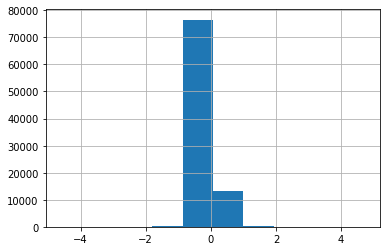

In [27]:
reduced_df.logerror.hist()

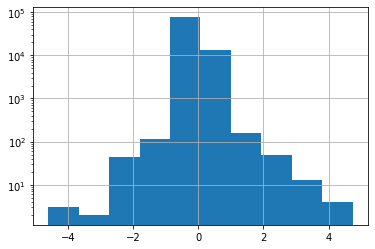

In [32]:
fig, ax = plt.subplots()
reduced_df.logerror.hist()
ax.set_yscale('log')# density on log scale